In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import load_model

In [2]:
data = 'Train'

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest')

In [4]:
data_generator = datagen.flow_from_directory(
    data,
    target_size=(28, 28),  
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 97224 images belonging to 100 classes.


In [5]:
X = []
y = []

for i in range(len(data_generator)):
    batch_x, batch_y = data_generator[i]
    X.extend(batch_x)
    y.extend(batch_y)

X = np.array(X)
y = np.array(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77779, 28, 28, 3)
(77779, 28, 28, 3)
(77779, 100)
(19445, 100)


In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', input_shape = (28,28,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation = 'softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)       

In [10]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test, y_test)
)

Epoch 1/30


2431/2431 [==============================] - 486s 198ms/step - loss: 1.4032 - accuracy: 0.6323 - val_loss: 0.2121 - val_accuracy: 0.9397
Epoch 2/30
2431/2431 [==============================] - 471s 194ms/step - loss: 0.3937 - accuracy: 0.8948 - val_loss: 0.1531 - val_accuracy: 0.9602
Epoch 3/30
2431/2431 [==============================] - 473s 194ms/step - loss: 0.3044 - accuracy: 0.9205 - val_loss: 0.1462 - val_accuracy: 0.9635
Epoch 4/30
2431/2431 [==============================] - 484s 199ms/step - loss: 0.2626 - accuracy: 0.9322 - val_loss: 0.1200 - val_accuracy: 0.9702
Epoch 5/30
2431/2431 [==============================] - 477s 196ms/step - loss: 0.2198 - accuracy: 0.9430 - val_loss: 0.1046 - val_accuracy: 0.9745
Epoch 6/30
2431/2431 [==============================] - 473s 195ms/step - loss: 0.1986 - accuracy: 0.9479 - val_loss: 0.0906 - val_accuracy: 0.9780
Epoch 7/30
2431/2431 [==============================] - 480s 198ms/step - loss: 0.1754 - accuracy: 0.9545 - va

In [11]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 99.92%
Testing Accuracy: 99.13%


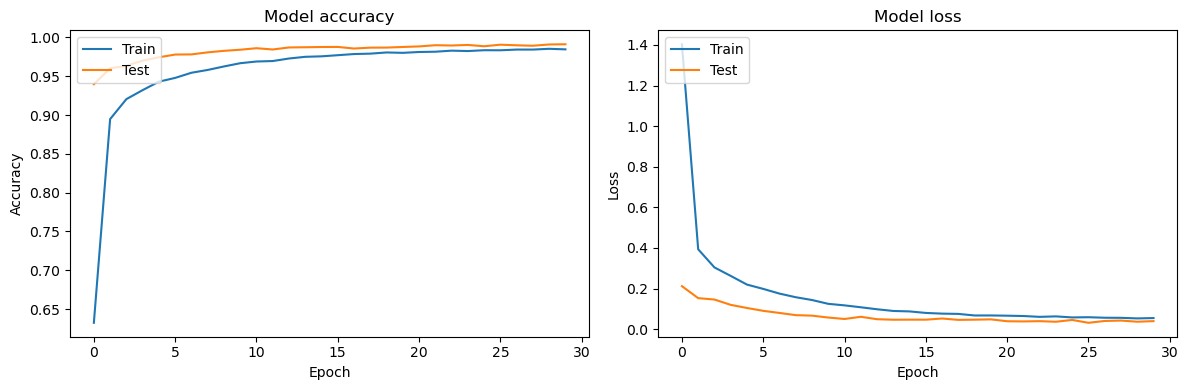

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
model.save('model.h5')
print("Model saved successfully")

C:\Users\ishit\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully


Enter image path (or 'exit' to quit): Test\0\img_4.png


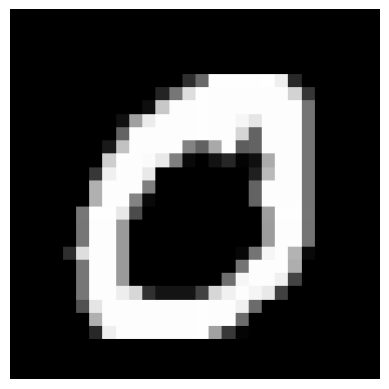

1/1 [==============================] - 0s 343ms/step
Predicted Class: 0
Enter image path (or 'exit' to quit): Test\97\img_2.png


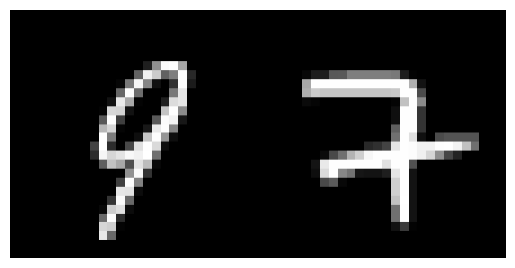

1/1 [==============================] - 0s 75ms/step
Predicted Class: 97
Enter image path (or 'exit' to quit): Test\99\img_3.png


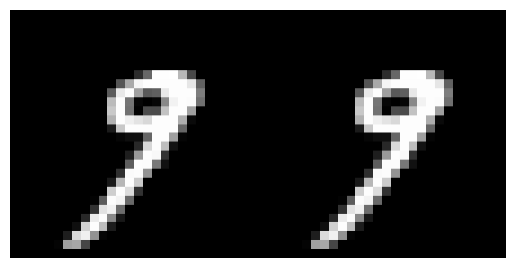

1/1 [==============================] - 0s 54ms/step
Predicted Class: 99
Enter image path (or 'exit' to quit): Test\78\img_2.png


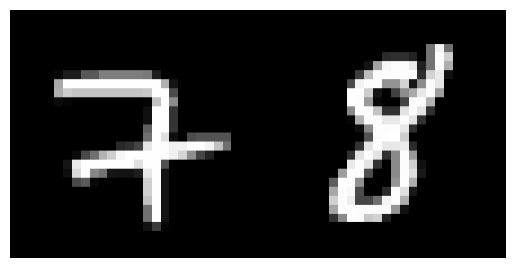

1/1 [==============================] - 0s 55ms/step
Predicted Class: 76
Enter image path (or 'exit' to quit): Test\15\img_3.png


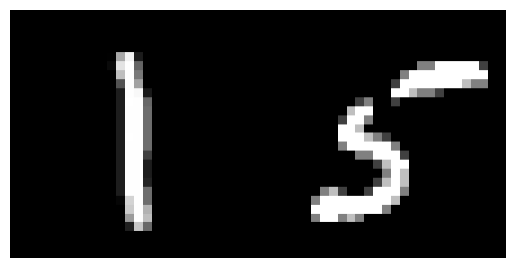

1/1 [==============================] - 0s 55ms/step
Predicted Class: 7
Enter image path (or 'exit' to quit): exit
Exited


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model('model.h5')

while True:
    image_path = input("Enter image path (or 'exit' to quit): ")
    if image_path.lower() == 'exit':
        print("Exited")
        break
    image = cv2.imread(image_path)
    if image is None:
        print("Invalid image path. Please try again.")
        continue

    plt.imshow(image)
    plt.axis('off')  
    plt.show()
    
    resized_image = cv2.resize(image, (28, 28))
    processed_image = resized_image / 255.0  
    processed_image = np.expand_dims(processed_image, axis=0)
    
    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions)
    print(f"Predicted Class: {predicted_class_index}")